In [2]:
import numpy as np
import pandas as pd

In [3]:
cols = ['word_freq_make','word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
         'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
         'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
         'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
         'word_freq_table','word_freq_conference','char_freq_; ','char_freq_( ','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
        'capital_run_length_average','capital_run_length_longest','capital_run_length_total', 'spam']
df = pd.read_csv('spambase.data', names=cols)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df.loc[:,df.columns != 'spam']
target = df.loc[:, 'spam']
# Split into training/testing
# The following will split as 75% training 25% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3000)
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_train

3941    0
2095    0
54      1
1852    0
3560    0
       ..
1876    0
949     1
1966    0
3841    0
1016    1
Name: spam, Length: 3450, dtype: int64

In [5]:
# format a number based on its magnitude
# If <= 100000, print using :.3f
# Else print using :.0e
def format_nbr(f):
    if abs(f) < 100000:
        return f'{f:.3f}'
    else:
        return f'{f:.4e}'

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

def run_model(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    err_train = 1-acc_train
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    err_test = 1-acc_test

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)

    print(f'   training accuracy = {format_nbr(acc_train)}')
    print(f'   testing accuracy = {format_nbr(acc_test)}')
    print(f'   training error = {format_nbr(err_train)}')
    print(f'   testing error = {format_nbr(err_test)}')
    print(f'   train f1 = {format_nbr(f1_train)}')
    print(f'   test f1 = {format_nbr(f1_test)}')
    print(f'   train AUC = {format_nbr(train_auc)}')
    print(f'   test AUC = {format_nbr(test_auc)}')

In [7]:
#1a train test accuracy, f1, auc
model = DecisionTreeClassifier(criterion="entropy")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.920
   training error = 0.001
   testing error = 0.080
   train f1 = 0.999
   test f1 = 0.901
   train AUC = 1.000
   test AUC = 0.922


In [8]:
#1b add gini index
model = DecisionTreeClassifier(criterion="gini")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.903
   training error = 0.001
   testing error = 0.097
   train f1 = 0.999
   test f1 = 0.878
   train AUC = 1.000
   test AUC = 0.902


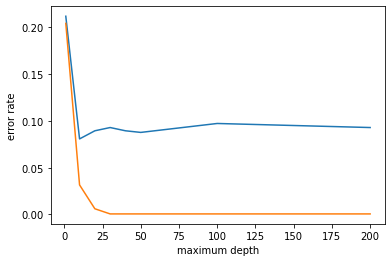

[0.21198957428323195,
 0.08079930495221543,
 0.08948740225890528,
 0.09296264118158126,
 0.08948740225890528,
 0.08774978279756729,
 0.09730668983492619,
 0.09296264118158126]

In [9]:
import matplotlib.pyplot as plt
#1c max depth

depth_col = []
train_errs = []
test_errs = []
for k in [1, 10, 20, 30, 40, 50, 100, 200]:
    result = DecisionTreeClassifier(max_depth = k)
    result.fit(x_train, y_train)
    y_train_predicted = result.predict(x_train)
    y_test_predicted = result.predict(x_test)
    acc_train = result.score(x_train, y_train)
    err_train = 1-acc_train
    acc_test = result.score(x_test, y_test)
    err_test = 1-acc_test
    depth_col.append(k)
    train_errs.append(err_train)
    test_errs.append(err_test)
    
plt.plot(depth_col, test_errs)
plt.plot(depth_col, train_errs)
plt.xlabel('maximum depth')
plt.ylabel('error rate')
plt.show()
test_errs

In [10]:
from sklearn.ensemble import RandomForestClassifier
#2a random forest

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = RandomForestClassifier(n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)

,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.996812,0.940052,0.995960,0.922034,0.999974,0.977782
1,50,0.999130,0.954822,0.998899,0.941704,0.999999,0.987773
2,100,0.999420,0.952215,0.999266,0.938272,0.999999,0.988466
3,500,0.999420,0.960035,0.999266,0.948775,0.999999,0.989275


word_freq_table               0.000163
word_freq_parts               0.000386
word_freq_857                 0.000544
word_freq_3d                  0.000785
word_freq_415                 0.000786
word_freq_addresses           0.001211
word_freq_conference          0.001335
word_freq_telnet              0.001368
word_freq_direct              0.001455
word_freq_cs                  0.001480
word_freq_original            0.001572
word_freq_lab                 0.002019
char_freq_[                   0.002060
word_freq_report              0.002254
word_freq_project             0.002300
word_freq_font                0.002318
word_freq_data                0.002760
char_freq_#                   0.002917
word_freq_pm                  0.003059
word_freq_people              0.003526
word_freq_labs                0.003583
word_freq_85                  0.003802
word_freq_make                0.003887
word_freq_credit              0.004345
word_freq_technology          0.004526
word_freq_order          

Text(0, 0.5, 'Mean decrease in impurity')

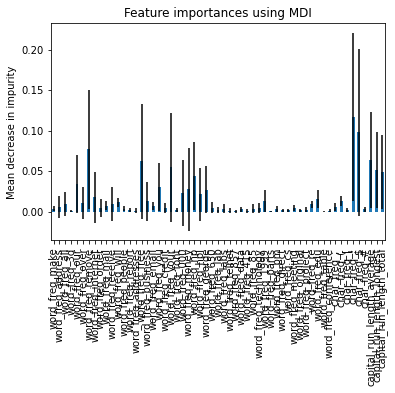

In [11]:
#2c variable of importance
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=cols[:-1])

print(forest_importances.sort_values())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [12]:
from sklearn.ensemble import AdaBoostClassifier
#3a AdaBoost

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)



,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.99942,0.921807,0.999267,0.899554,0.999999,0.960301
1,50,0.99942,0.945265,0.999267,0.930387,0.999999,0.978211
2,100,0.99942,0.953084,0.999267,0.939866,0.999999,0.986006
3,500,0.99942,0.951347,0.999266,0.937778,0.999999,0.986758


Decision Tree


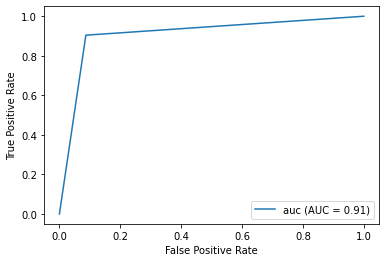

Random Forest


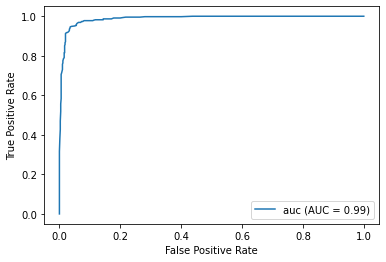

AdaBoost


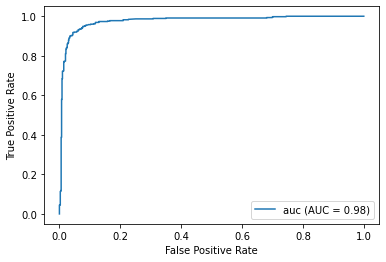

In [13]:
#3c roc curves 
def plot_roc(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    probs = model.predict_proba(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
    auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='auc')
    display.plot()
    plt.show()
    
estimators = {'Decision Tree': DecisionTreeClassifier(),
             'Random Forest': RandomForestClassifier(n_estimators = 100),
             'AdaBoost' : AdaBoostClassifier(n_estimators = 100)}
for name, model in estimators.items():
    print (name)
    plot_roc(model)

In [14]:
mushroom_cols = ['class','cap_shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size'
                , 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring'
                , 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', ' habitat']
df_shroom = pd.read_csv('agaricus-lepiota.data', names=mushroom_cols)
df_shroom

,class,cap_shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
features = df_shroom.loc[:,df_shroom.columns != 'class']
target = df_shroom.loc[:, 'class']
# Split into training/testing
# The following will split as 75% training 25% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3000)
y_train

5122    e
4903    p
5145    p
3722    e
3587    e
       ..
1966    e
3841    e
1016    e
7731    p
7676    p
Name: class, Length: 6093, dtype: object

In [24]:
for name, value in x_train['cap_shape'].value_counts().items():
    print (name)
    print (value)

x
2733
f
2359
k
629
b
348
s
22
c
2


In [ ]:
#4a naive bayes
class NaiveBayes:
    def __init__(self):
        self.probs = []
        
    def gauss_density(self, x, y, classification):
        full_df = x.append(y)
        mean = full_df.groupby(y)[classification].mean()
        var = full_df.groupby(y)[classification].var()
        prob = np.exp((-1/2)*((x-mean)**2) / (2 * var))/np.sqrt(2 * np.pi * var)
        return prob
    
    def prior(self, y):
        self.classes = np.unique(y)
        for class_id in self.classes:
            self.pi[class_id] = sum(y == class_id) / y.shape[0]
        return self.pi

    def cond_probs(self, x, y):
        probs = {}
        for y_k in self.classes:
            x_k = x[y == y_k]  # training samples where y == y_k
            for feature in x_k.columns.values:
                col = x_k[feature]
                for name, value in col.value_counts().items():
                    # p(X=x|y=k) = x where y is true/all of x
                    probs[(y_k, feature, name)] = value/x[name].value_counts()
    
    def fit(self, x, y):
        return 0
    
    def predict(self, x):
        return 0


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()  # instantiate the encoder
clf_nb = CategoricalNB() #instantiate the classifier
clf_nb.fit( enc.fit_transform(X_train), y_train) # fit using encoded training data
pred = clf_nb.predict(enc.transform(X_test)) # predict using encoded training data
accuracy_score(y_test, pred)